#### Use below code to convert the csv files to an sqlite database dump.

In [1]:
import pandas as pd
import sqlite3
import glob
import os

In [2]:
eventTypeTableFilenames = [fn for fn in glob.glob('event_*.csv') 
                           if not fn == "event_map_type.csv" and not fn == "event_object.csv"]
objectTypeTableFilenames =  [fn for fn in glob.glob('object_*.csv') 
                             if not fn == "object_map_type.csv" and not fn == "object_object.csv"]

TABLES = dict()

TABLES["event"] = pd.read_csv("event.csv", sep=";")
TABLES["event_map_type"] = pd.read_csv("event_map_type.csv", sep=";")
TABLES["event_object"] = pd.read_csv("event_object.csv", sep=";")
TABLES["object"] = pd.read_csv("object.csv", sep=";")
TABLES["object_object"] = pd.read_csv("object_object.csv", sep=";")
TABLES["object_map_type"] = pd.read_csv("object_map_type.csv", sep=";")

for fn in eventTypeTableFilenames:
    table_name = fn.split(".")[0]
    table = pd.read_csv(fn, sep=";")
    TABLES[table_name] = table
    
for fn in objectTypeTableFilenames:
    table_name = fn.split(".")[0]
    table = pd.read_csv(fn, sep=";")
    TABLES[table_name] = table

In [3]:
sql_path = "../../order-management.sqlite"
if os.path.exists(sql_path):
    os.remove(sql_path)

In [4]:
conn = sqlite3.connect(sql_path)
for tn, df in TABLES.items():
    df.to_sql(tn, conn, index=False)
conn.close()

#### Use below code to start working with the log in PM4PY.

In [6]:
import pm4py
sql_path = "../../order-management.sqlite"
ocel = pm4py.read_ocel2_sqlite(sql_path)

C:\Users\knopp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\ocel\importer\sqlite\variants\ocel20.py:65: UserWarning: There are unsatisfied OCEL 2.0 constraints in the given relational database: ['const_14_primary_key_object_event_map_type_tables', 'const_15_primary_key_object_event_tables', 'const_16_primary_key_event_object_table', 'const_17_primary_key_object_object_table', 'const_18_primary_key_event_type_spec_tables', 'const_19_foreign_key_event', 'const_20_foreign_key_object', 'const_21_foreign_key_event_object', 'const_22_foreign_key_object_object', 'const_23_foreign_key_event_type_specific', 'const_24_foreign_key_object_type_specific']
  warnings.warn("There are unsatisfied OCEL 2.0 constraints in the given relational database: "+str(unsatisfied))
C:\Users\knopp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\ocel\importer\sqlite\variants\ocel20.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [7]:
ocel

Object-Centric Event Log (number of events: 27488, number of objects: 10781, number of activities: 11, number of object types: 6, events-objects relationships: 172744)
Activities occurrences: {'pick item': 7592, 'item out of stock': 4803, 'reorder item': 4803, 'place order': 2000, 'confirm order': 2000, 'pay order': 2000, 'create package': 1136, 'send package': 1136, 'package delivered': 1136, 'payment reminder': 518, 'failed delivery': 364}
Object types occurrences (number of objects): {'items': 7592, 'orders': 2000, 'packages': 1136, 'products': 20, 'employees': 18, 'customers': 15}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.

In [8]:
from statistics import mean, stdev

relations = ocel.relations[ocel.relations["ocel:type"] == "products"]
print(relations)


                ocel:eid     ocel:oid ocel:qualifier      ocel:activity  \
6         place_o-990001         Echo        product        place order   
7         place_o-990001  Echo Show 5        product        place order   
8         place_o-990001         iPad        product        place order   
9         place_o-990001    Echo Plus        product        place order   
12         pick_i-880002  Echo Show 5        product          pick item   
...                  ...          ...            ...                ...   
172734     send_p-661136    iPhone 11        product       send package   
172735     send_p-661136     iPad Pro        product       send package   
172740  deliver_p-661136    iPad mini        product  package delivered   
172741  deliver_p-661136    iPhone 11        product  package delivered   
172742  deliver_p-661136     iPad Pro        product  package delivered   

            ocel:timestamp ocel:type  
6      2023-04-03 12:08:18  products  
7      2023-04-03 12:

In [37]:
relations = relations[relations["ocel:activity"] == "place order"]
print(relations)


              ocel:eid           ocel:oid ocel:qualifier ocel:activity  \
5       place_o-990001               Echo        product   place order   
6       place_o-990001      iPhone 11 Pro        product   place order   
15      place_o-990002        MacBook Pro        product   place order   
16      place_o-990002  Kindle Paperwhite        product   place order   
17      place_o-990002          iPad mini        product   place order   
...                ...                ...            ...           ...   
145169  place_o-991998        Echo Studio        product   place order   
145170  place_o-991998        MacBook Pro        product   place order   
145178  place_o-991999          iPhone 11        product   place order   
145179  place_o-991999           iPhone 8        product   place order   
145187  place_o-992000           iPad Air        product   place order   

            ocel:timestamp ocel:type  
5      2023-04-03 12:08:18  products  
6      2023-04-03 12:08:18  produ

In [38]:
rel_objs = relations.groupby("ocel:eid")["ocel:oid"].size().reset_index()

print(mean(rel_objs["ocel:oid"]))
print(stdev(rel_objs["ocel:oid"]))

3.49
1.6487143868981013


In [39]:
log = pm4py.write_ocel2_xml(ocel, 'order-management.xml')

In [9]:
ocpn = pm4py.discover_oc_petri_net(ocel)

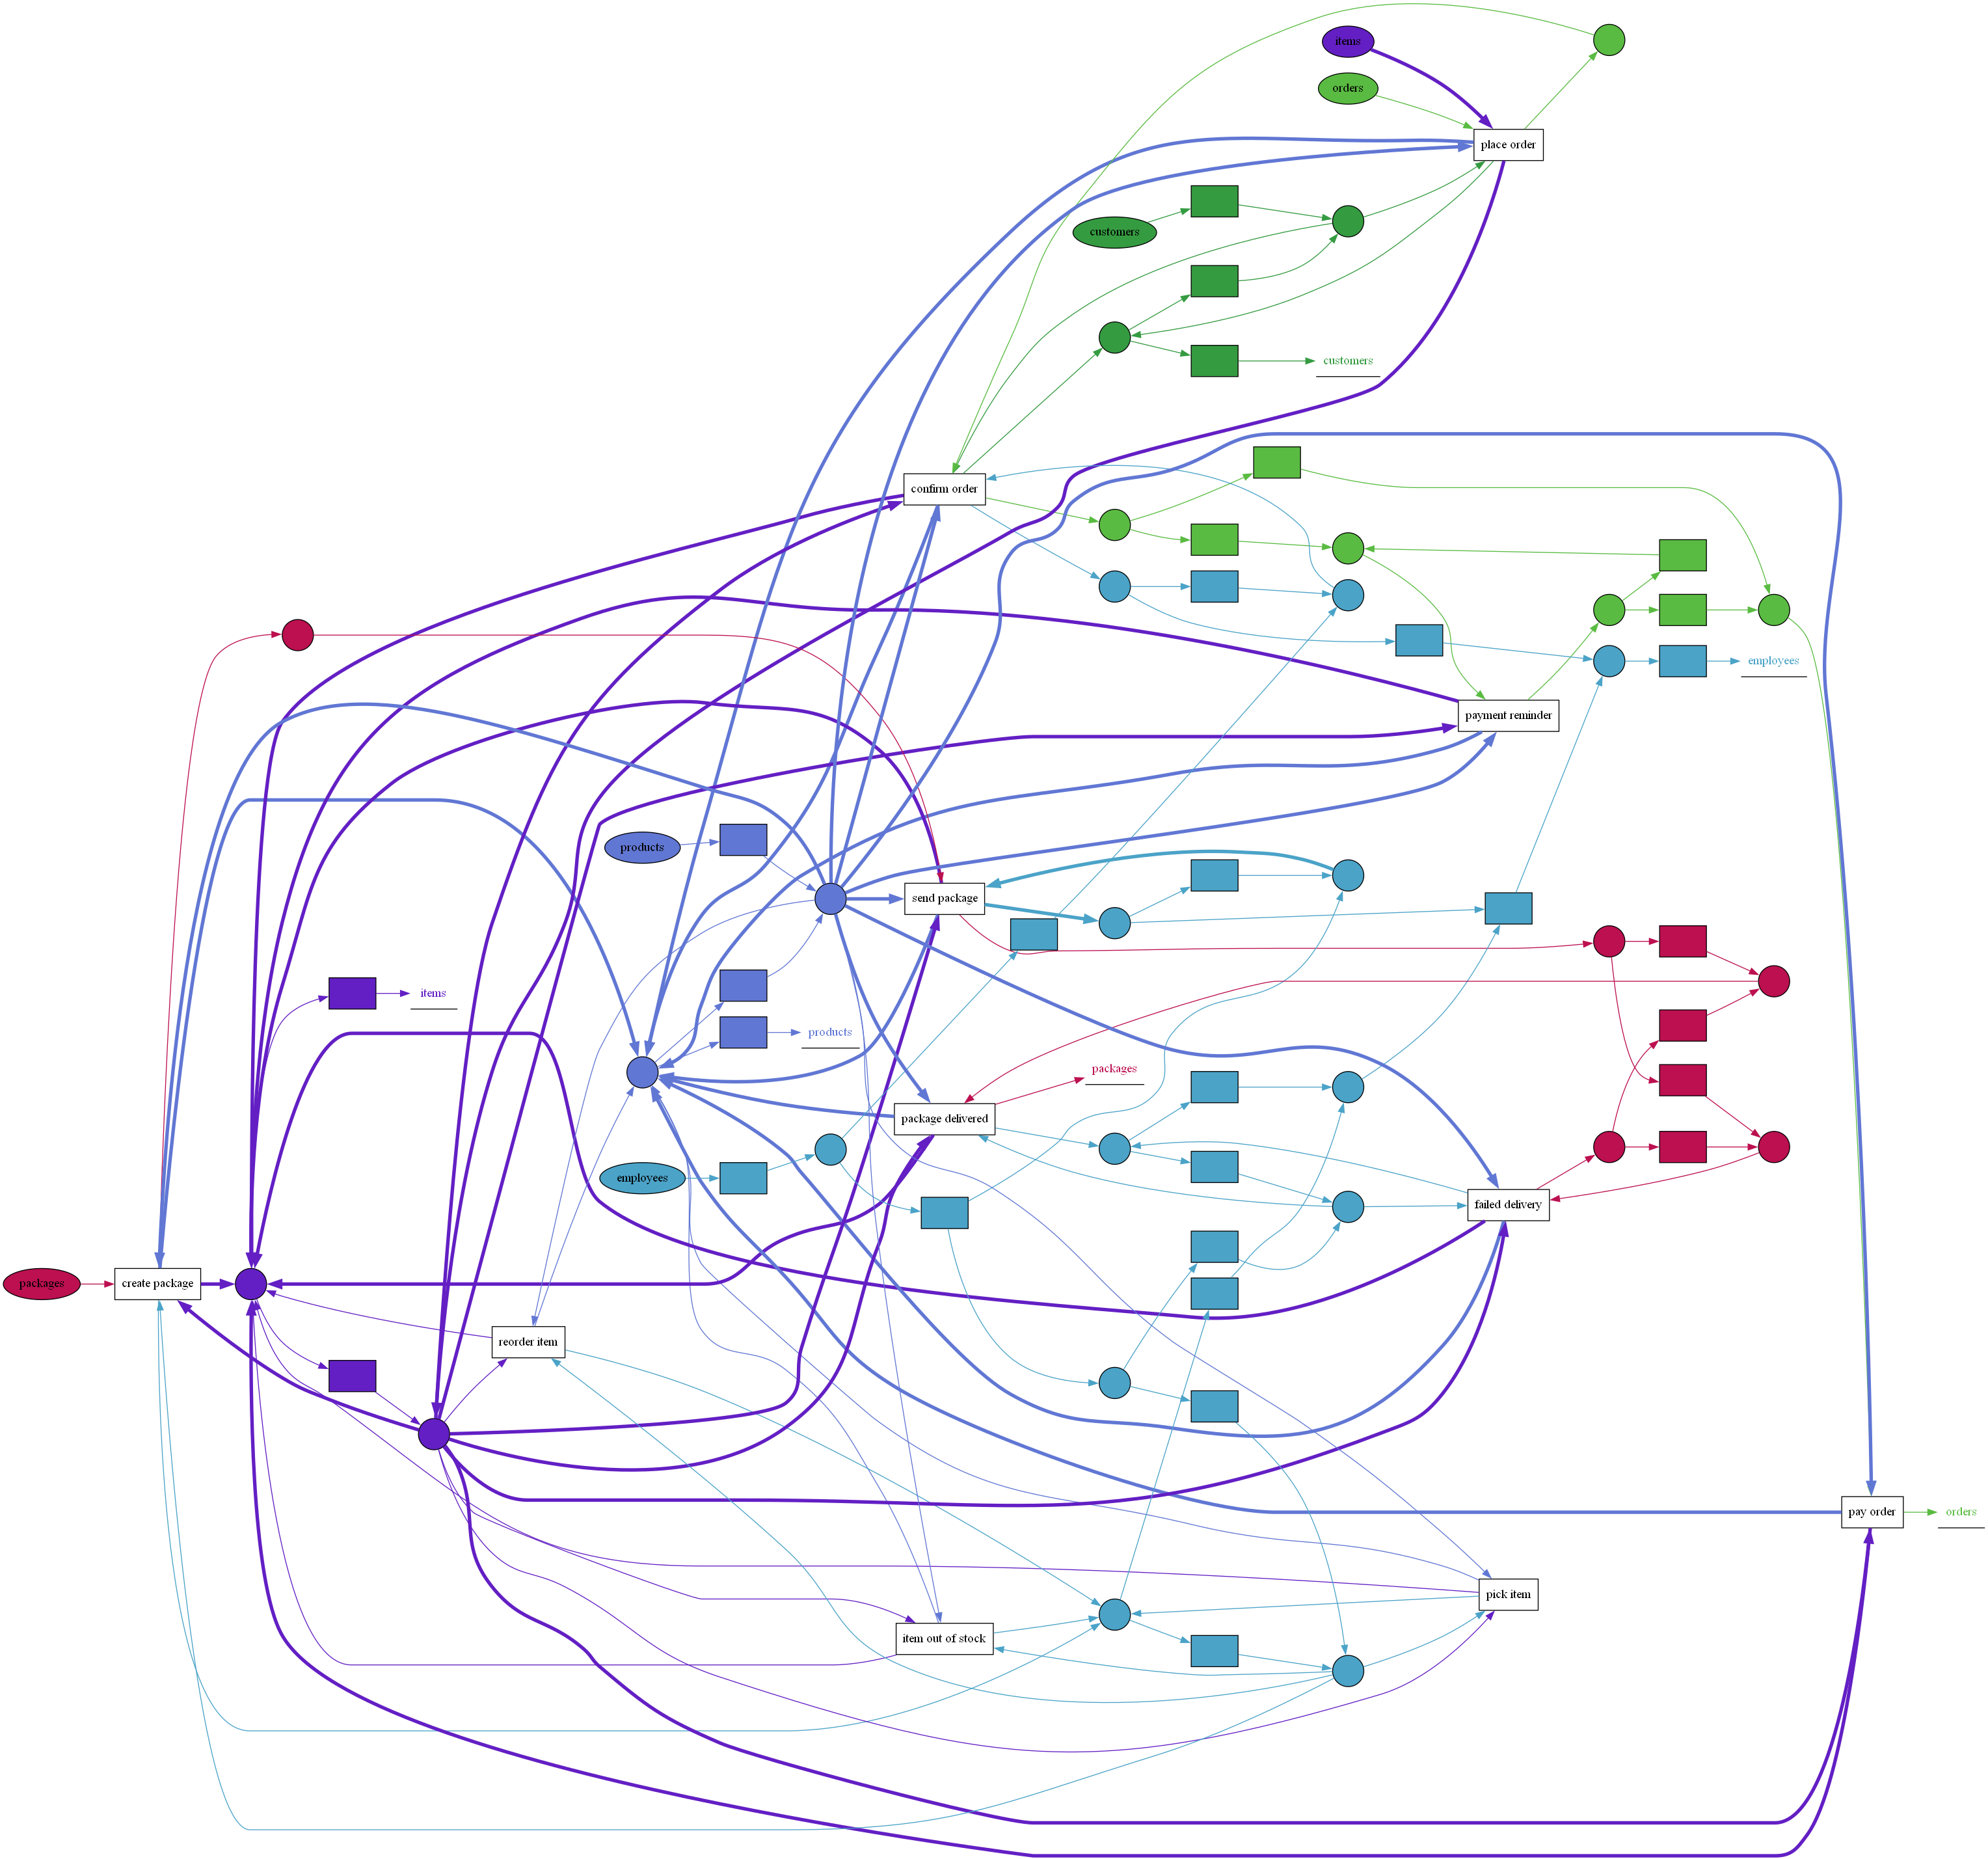

In [10]:
pm4py.view_ocpn(ocpn)